In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [17]:
data = pd.read_csv('https://raw.githubusercontent.com/MehrnazFarahmand/My-Repo/main/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [18]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [20]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [21]:
for i in data.columns:
    print(data[i].value_counts())
    print('\n')

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64


No     1233
Yes     237
Name: Attrition, dtype: int64


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     2

There are a few columns that have one value, we can lose those as well as employee number which has no impact on target



In [22]:
data.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'], axis=1, inplace=True)

In [23]:
data.shape

(1470, 31)

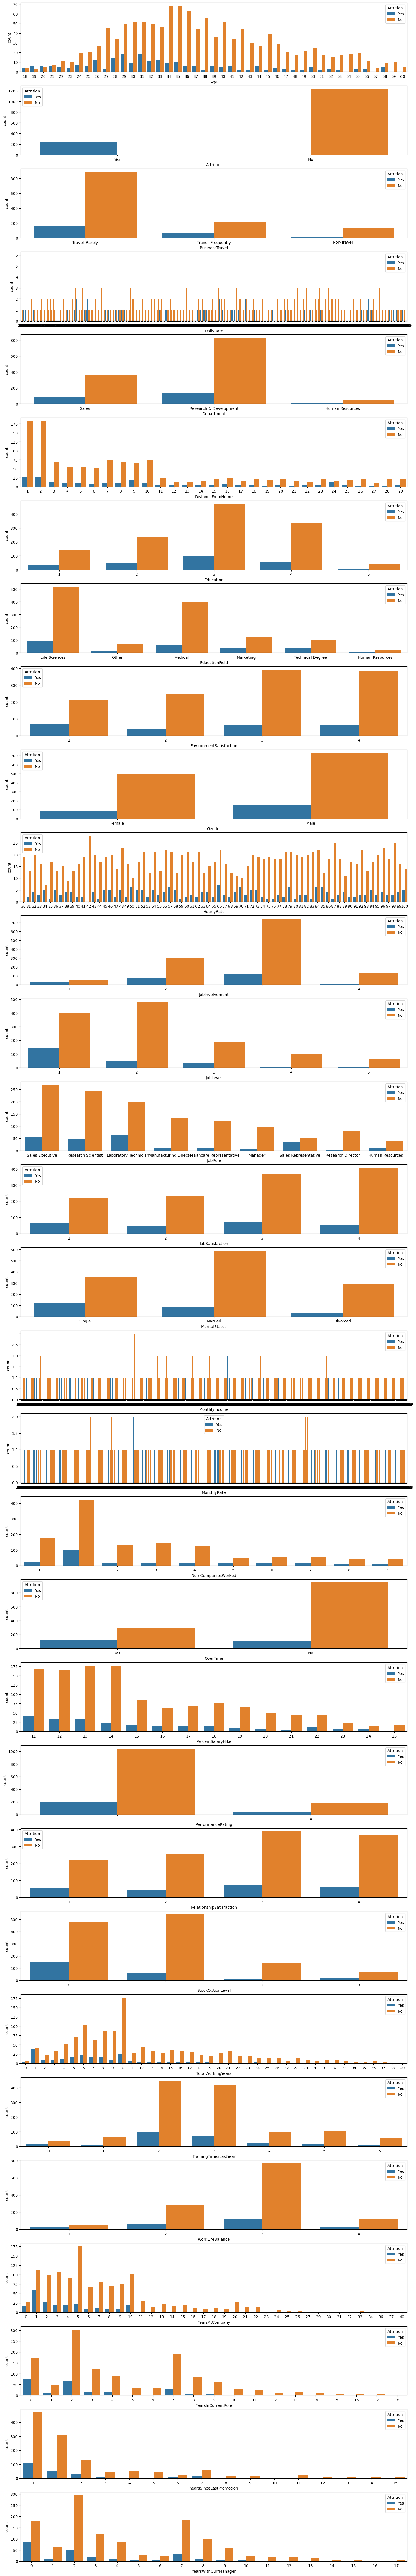

In [24]:
plt.figure(figsize = (18,120))
plotnumber = 1
for col in data.columns:
    if plotnumber<=31:
        ax = plt.subplot(31,1,plotnumber)
        sns.countplot(x = data[col], hue=data['Attrition'])
        plt.xlabel(col)
        plotnumber +=1

## Observations so far:



*   Attrition is higher in younger ages
*   Attrition is lower the longer people stay at company but it's quite high in the first coupl of years they have joined the company
* from 2 years onward in a role the attrition rate drops
* salary hike doesn't seem to have played a role in keeping employees
* single people are more likely to leave their job
* high attrition rate in sales representative role
* employees seem to stay in level 2 jobs more than others
* people in sales have higher attrition rate



In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le = LabelEncoder()
for col in data.columns:
  if data[col].dtype == 'object':
    data[col] = le.fit_transform(data[col])

<Axes: >

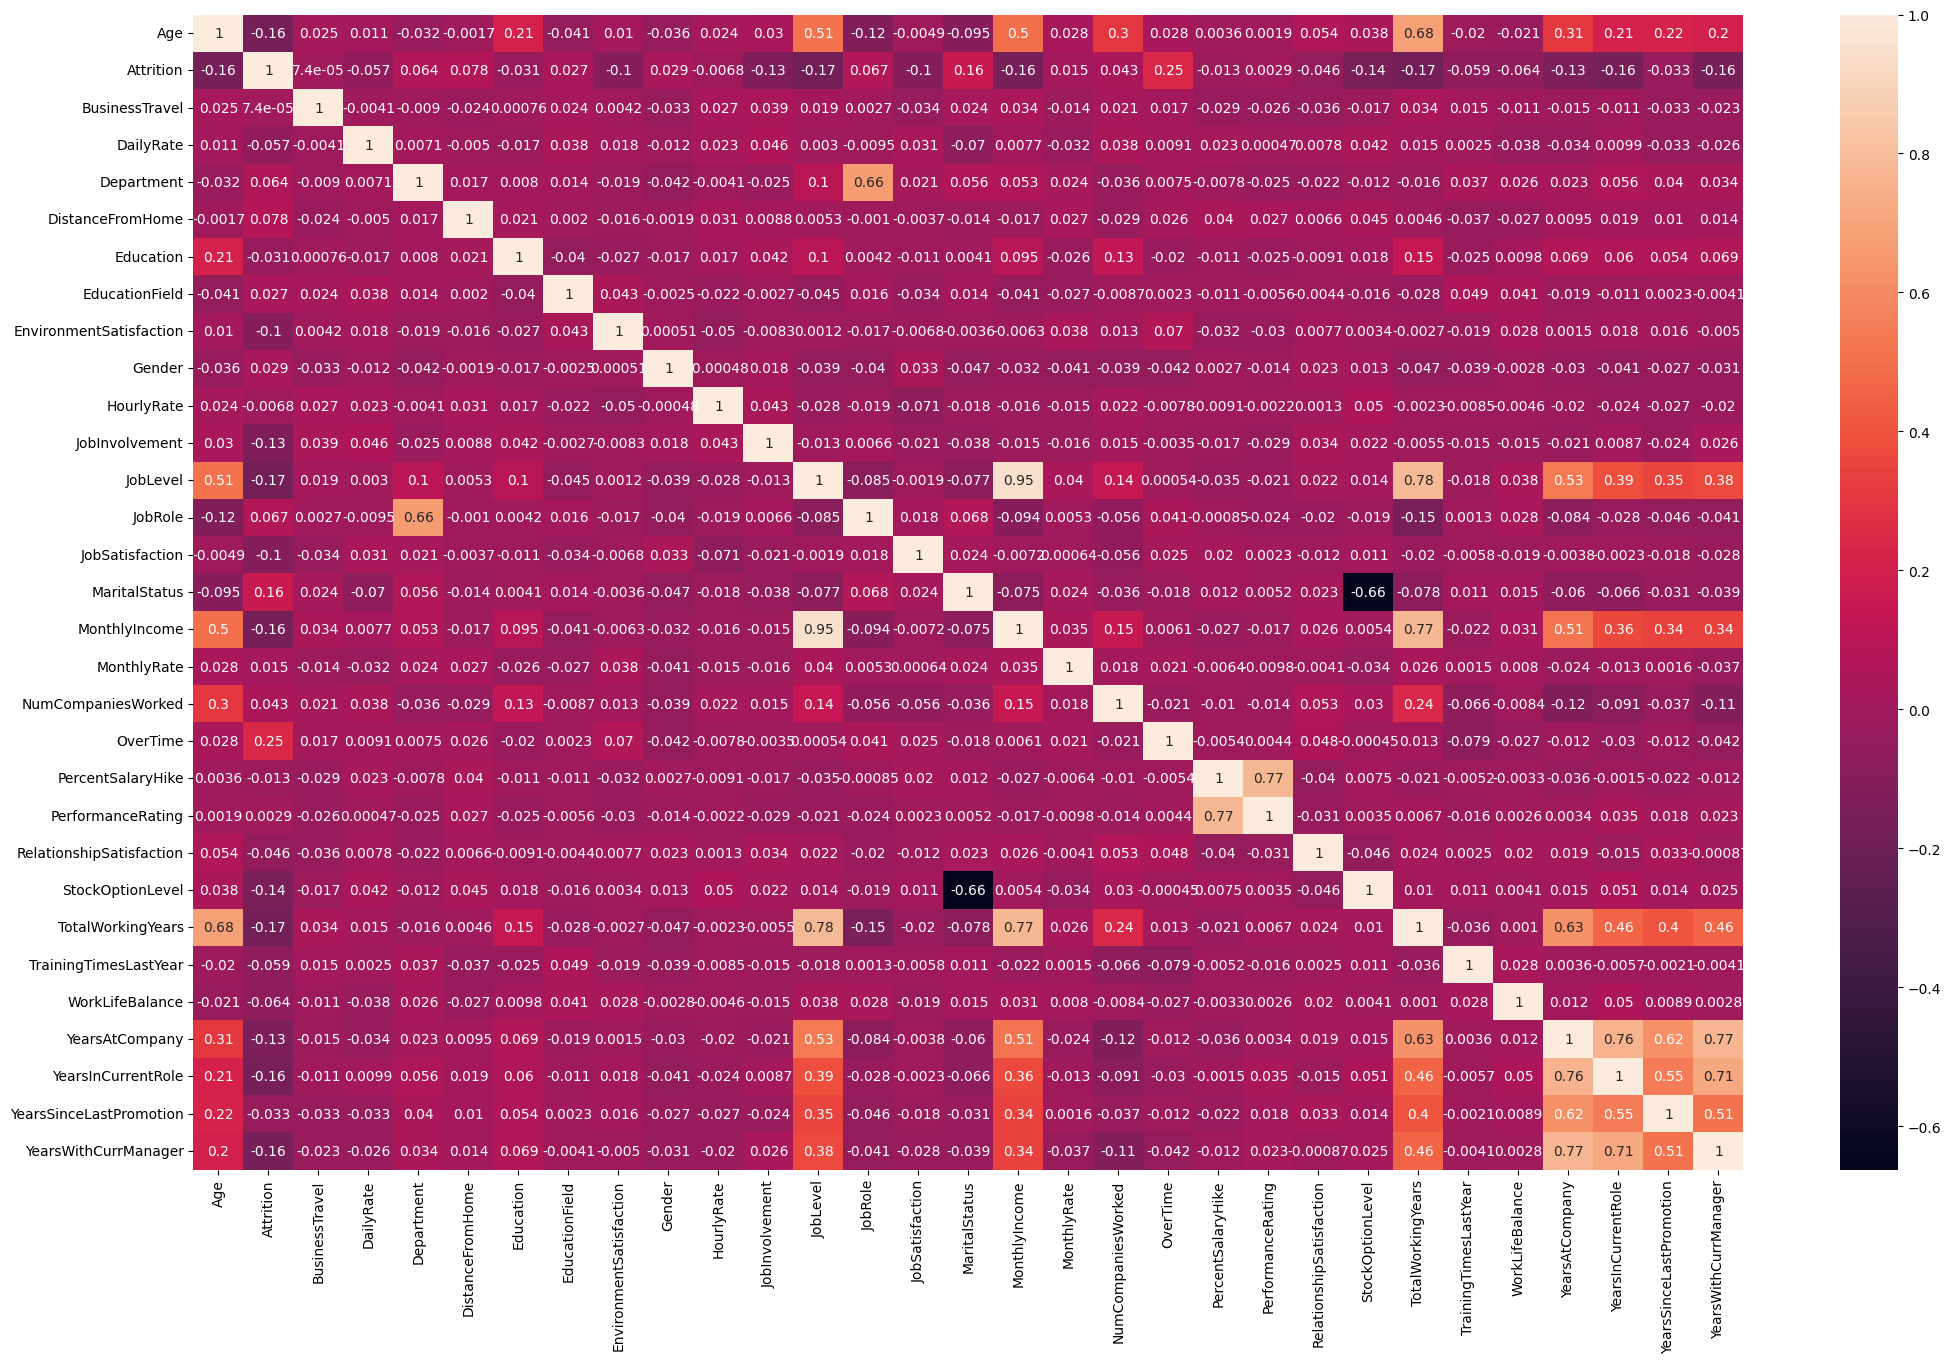

In [27]:
plt.figure(figsize = (25,15))
sns.heatmap(data.corr(), annot = True)

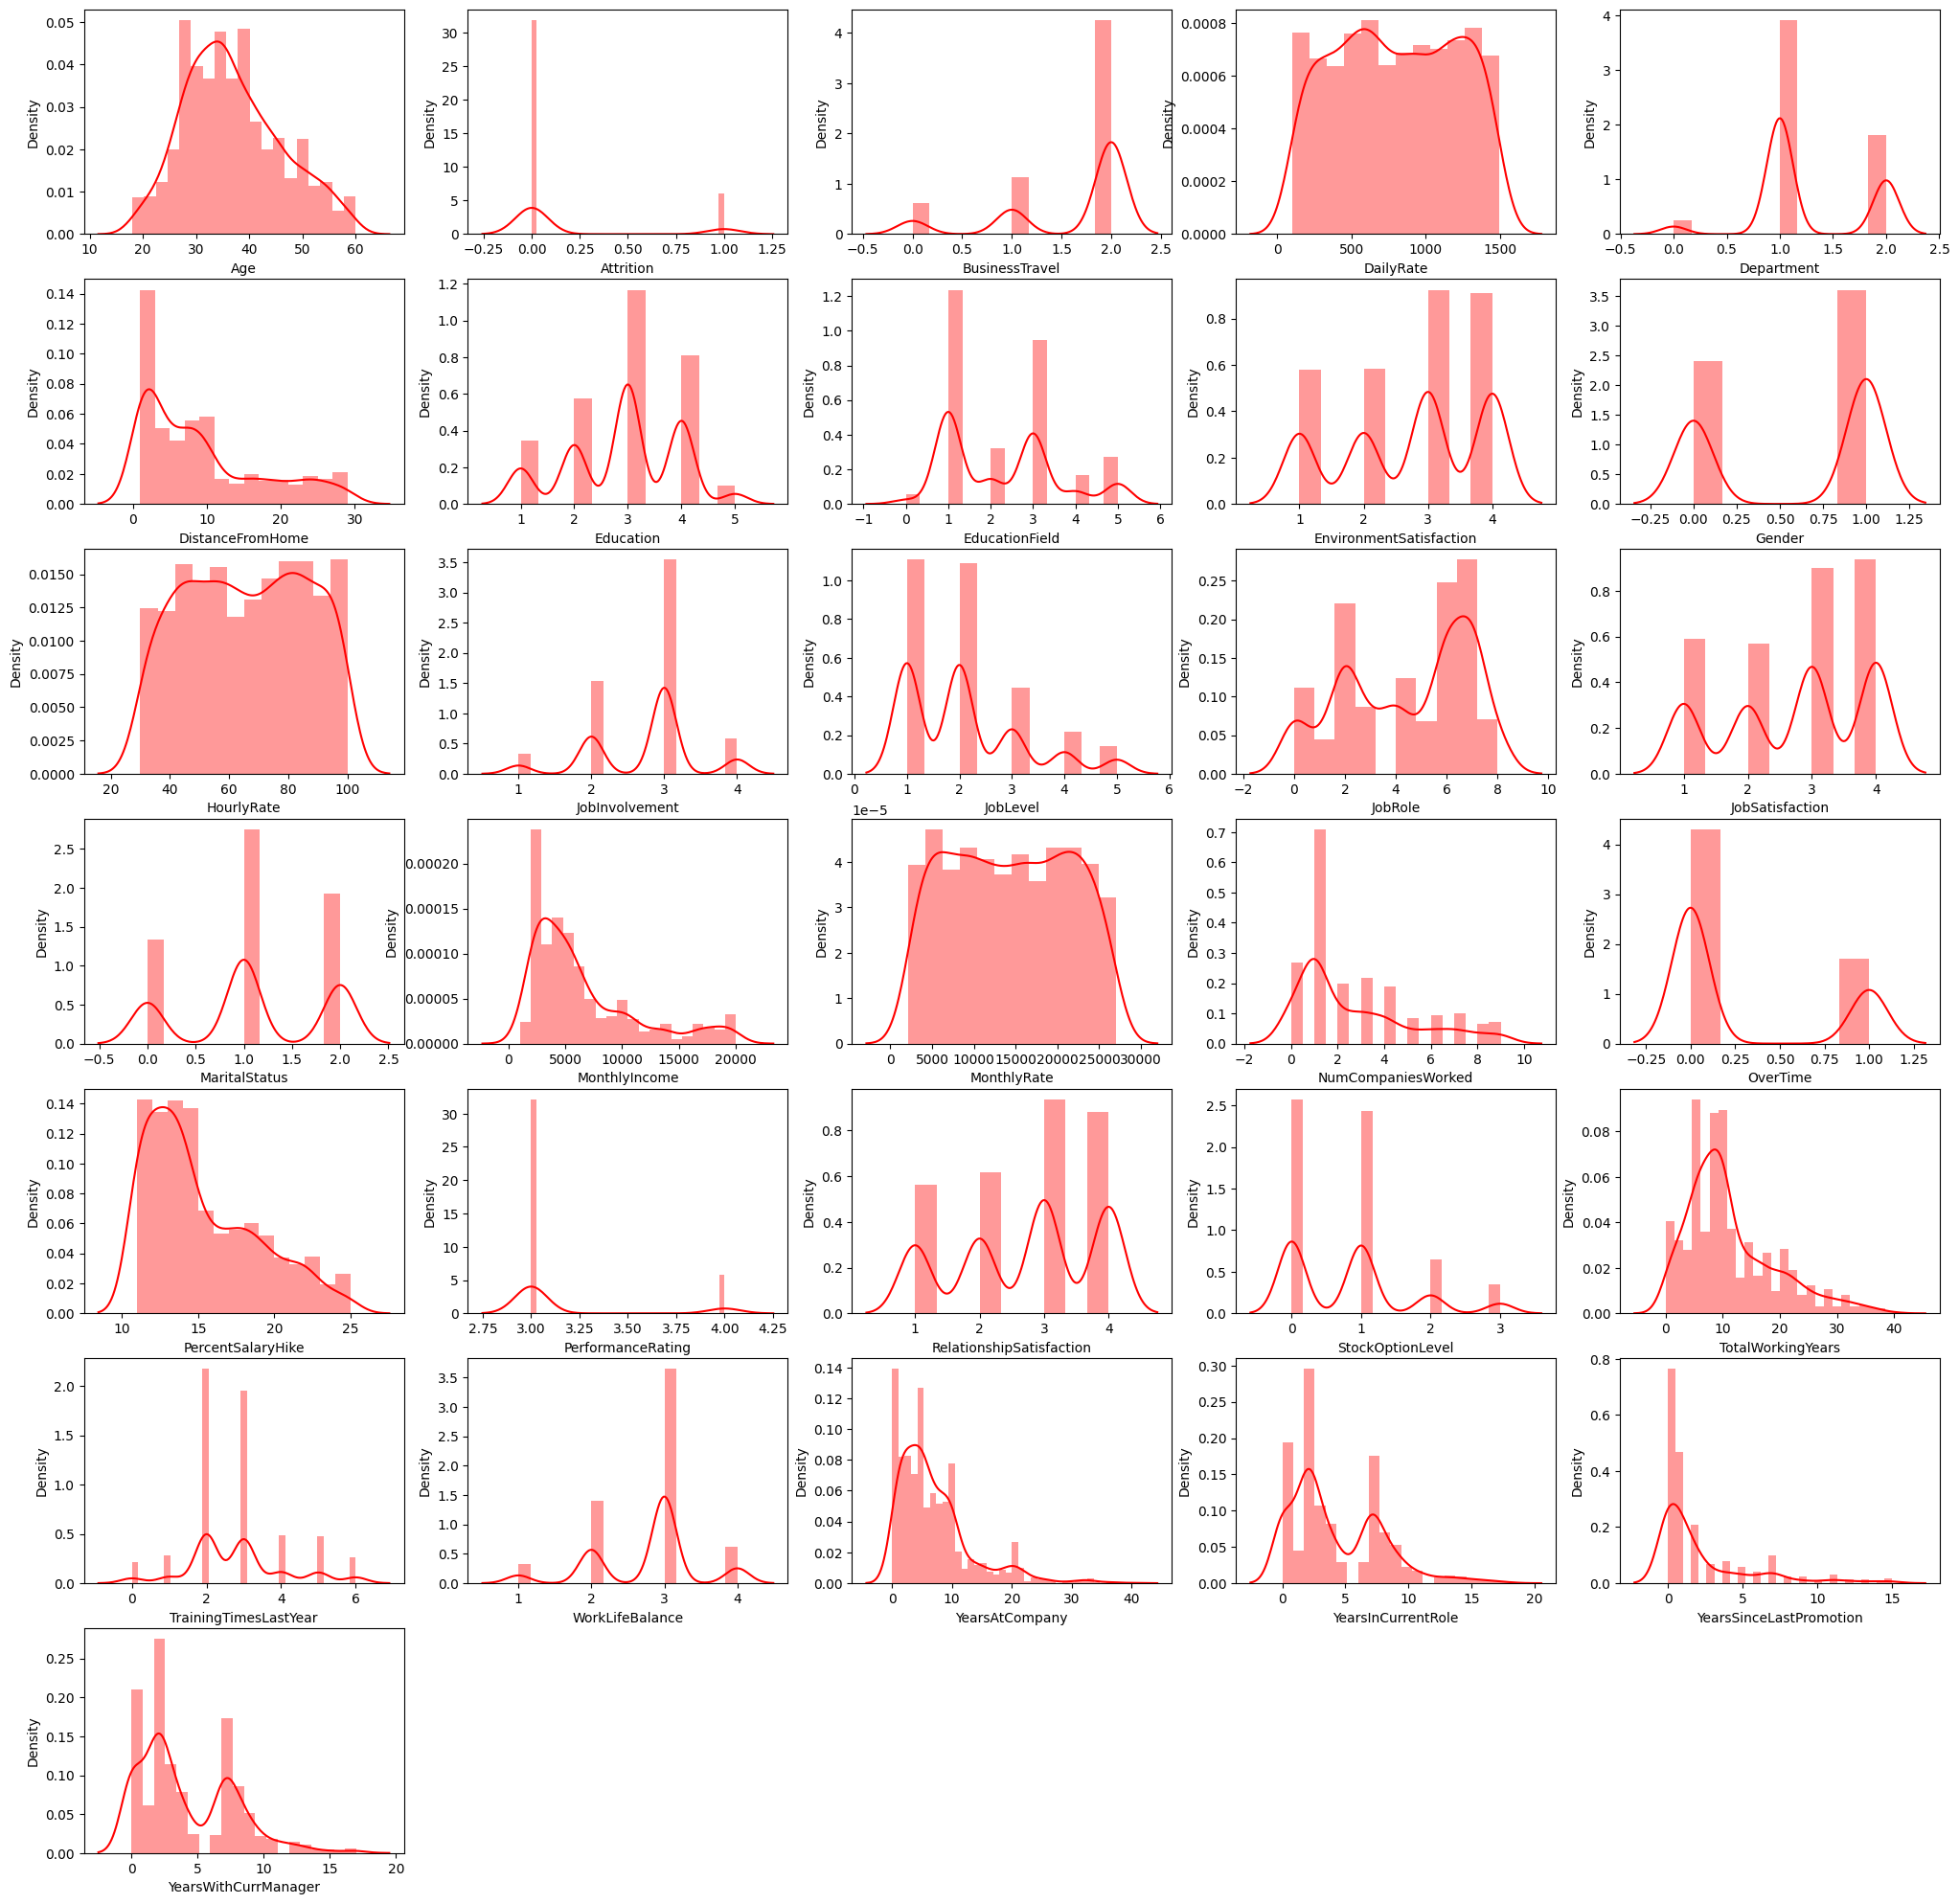

In [28]:
plt.figure(figsize = (25,25))
plotnumber = 1
for col in data.columns:
    if plotnumber<=31:
        ax = plt.subplot(7,5,plotnumber)
        sns.distplot(data[col], color='r')
        plt.xlabel(col)
        plotnumber +=1

In [29]:
data.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

There seem to be high correlation between some features

most columns have normal distribution and some have a little skewness, we can leave it for now as we will most probably be dropping some of these columns due to multicolinearity


In [31]:
from sklearn.preprocessing import StandardScaler

In [33]:
x = data.drop('Attrition', axis=1)
y = data['Attrition']

In [34]:
scaler = StandardScaler()

x_scaled = pd.DataFrame(scaler.fit_transform(x), columns= x.columns)

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_scaled.values,i) for i in range(len(x_scaled.columns))]
vif['Features'] = x_scaled.columns
vif

,VIF,Features
0,2.054172,Age
1,1.016413,BusinessTravel
2,1.023990,DailyRate
3,1.942150,Department
4,1.017135,DistanceFromHome
5,1.063531,Education
6,1.016236,EducationField
7,1.017516,EnvironmentSatisfaction
8,1.019383,Gender
9,1.021142,HourlyRate


In [37]:
x_scaled.drop(['JobLevel','MonthlyIncome','YearsAtCompany'], axis=1, inplace=True)

In [38]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_scaled.values,i) for i in range(len(x_scaled.columns))]
vif['Features'] = x_scaled.columns
vif

,VIF,Features
0,2.036291,Age
1,1.014377,BusinessTravel
2,1.021207,DailyRate
3,1.826500,Department
4,1.012189,DistanceFromHome
5,1.063133,Education
6,1.014080,EducationField
7,1.016792,EnvironmentSatisfaction
8,1.018956,Gender
9,1.018178,HourlyRate


In [58]:
y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

Target counts needs balancing

In [59]:
from imblearn.over_sampling import SMOTE

In [60]:
sm = SMOTE()
x1, y1 = sm.fit_resample(x_scaled,y)

In [61]:
y1.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [66]:
MaxAccu = 0
MaxRS = 0
for i in range(1,300):
  x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.30,random_state=i)
  LR = LogisticRegression()
  LR.fit(x_train,y_train)
  pred = LR.predict(x_test)
  acc = accuracy_score(y_test,pred)
  if acc > MaxAccu:
    MaxAccu = acc
    MaxRS = i
print('MAximum Accuracy:',MaxAccu,'\n', 'Best Random State:',MaxRS)

MAximum Accuracy: 0.7905405405405406 
 Best Random State: 124


In [67]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.30,random_state=MaxRS)

In [65]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import cross_val_score

**Random Forest Classifier**

In [68]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
RFCpred = RFC.predict(x_test)
print(accuracy_score(y_test,RFCpred))
print(confusion_matrix(y_test,RFCpred))
print(classification_report(y_test,RFCpred))

0.9310810810810811
[[357  17]
 [ 34 332]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       374
           1       0.95      0.91      0.93       366

    accuracy                           0.93       740
   macro avg       0.93      0.93      0.93       740
weighted avg       0.93      0.93      0.93       740



**Logistic Regression**

In [69]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
LRpred = LR.predict(x_test)
print(accuracy_score(y_test,LRpred))
print(confusion_matrix(y_test,LRpred))
print(classification_report(y_test,LRpred))

0.7905405405405406
[[291  83]
 [ 72 294]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       374
           1       0.78      0.80      0.79       366

    accuracy                           0.79       740
   macro avg       0.79      0.79      0.79       740
weighted avg       0.79      0.79      0.79       740



**Support Vector**

In [70]:
svc = SVC()
svc.fit(x_train,y_train)
svcpred = svc.predict(x_test)
print(accuracy_score(y_test,svcpred))
print(confusion_matrix(y_test,svcpred))
print(classification_report(y_test,svcpred))

0.9175675675675675
[[335  39]
 [ 22 344]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       374
           1       0.90      0.94      0.92       366

    accuracy                           0.92       740
   macro avg       0.92      0.92      0.92       740
weighted avg       0.92      0.92      0.92       740



**Gradient Boosting**

In [71]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
GBCpred = GBC.predict(x_test)
print(accuracy_score(y_test,GBCpred))
print(confusion_matrix(y_test,GBCpred))
print(classification_report(y_test,GBCpred))

0.9283783783783783
[[357  17]
 [ 36 330]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       374
           1       0.95      0.90      0.93       366

    accuracy                           0.93       740
   macro avg       0.93      0.93      0.93       740
weighted avg       0.93      0.93      0.93       740



**Bagging**

In [72]:
BC = BaggingClassifier()
BC.fit(x_train,y_train)
BCpred = BC.predict(x_test)
print(accuracy_score(y_test,BCpred))
print(confusion_matrix(y_test,BCpred))
print(classification_report(y_test,BCpred))

0.9162162162162162
[[351  23]
 [ 39 327]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       374
           1       0.93      0.89      0.91       366

    accuracy                           0.92       740
   macro avg       0.92      0.92      0.92       740
weighted avg       0.92      0.92      0.92       740



**Cross Validation**

In [75]:
score = cross_val_score(RFC, x1,y1)
print(score)
print(score.mean())
print('Difference Between score mean and accuracy score:', accuracy_score(y_test,RFCpred)-score.mean())

[0.75910931 0.97160243 0.96146045 0.95943205 0.98580122]
0.9274810915571031
Difference Between score mean and accuracy score: 0.0035999895239779978


In [76]:
score1 = cross_val_score(LR, x1,y1)
print(score1)
print(score1.mean())
print('Difference Between score mean and accuracy score:', accuracy_score(y_test,LRpred)-score1.mean())

[0.75910931 0.74442191 0.75659229 0.7484787  0.77687627]
0.7570956960195777
Difference Between score mean and accuracy score: 0.03344484452096286


In [77]:
score2 = cross_val_score(svc, x1,y1)
print(score2)
print(score2.mean())
print('Difference Between score mean and accuracy score:', accuracy_score(y_test,svcpred)-score2.mean())

[0.89878543 0.9148073  0.9188641  0.92292089 0.92292089]
0.9156597219370786
Difference Between score mean and accuracy score: 0.001907845630488958


In [78]:
score3 = cross_val_score(GBC, x1,y1)
print(score3)
print(score3.mean())
print('Difference Between score mean and accuracy score:', accuracy_score(y_test,GBCpred)-score3.mean())

[0.56477733 0.95740365 0.96754564 0.95334686 0.97565923]
0.8837465406377545
Difference Between score mean and accuracy score: 0.04463183774062385


In [79]:
score4 = cross_val_score(BC, x1,y1)
print(score4)
print(score4.mean())
print('Difference Between score mean and accuracy score:', accuracy_score(y_test,BCpred)-score4.mean())

[0.72469636 0.94117647 0.94523327 0.93509128 0.95131846]
0.8995031657783873
Difference Between score mean and accuracy score: 0.01671305043782889


Random Forest and Support Vector both seem to be good models

In [53]:
from sklearn import metrics

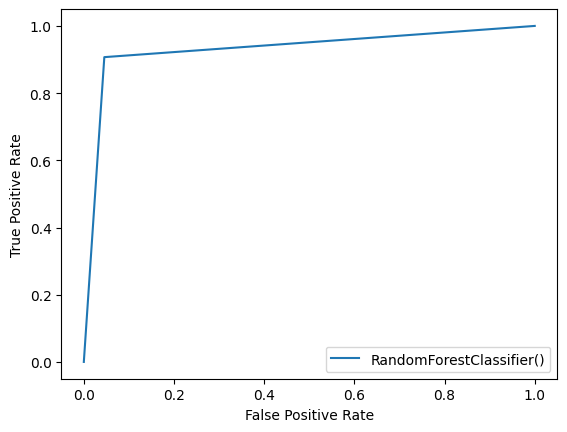

In [80]:
fpr,tpr,thresholds = metrics.roc_curve(y_test,RFCpred)
roc_auc = metrics.auc(fpr,tpr)
rfcurve = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, estimator_name = RFC)
rfcurve.plot()

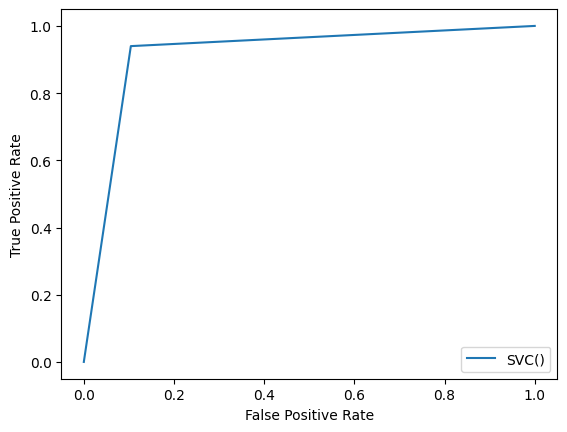

In [81]:
fpr,tpr,thresholds = metrics.roc_curve(y_test,svcpred)
roc_auc = metrics.auc(fpr,tpr)
rfcurve = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, estimator_name = svc)
rfcurve.plot()

SVC seem to be slightly better so we will go ahead with it

**Tuning Parameters**

In [83]:
from sklearn.model_selection import GridSearchCV

In [88]:
param = {'C': [5, 10, 50, 100], 'gamma': ['scale','auto'],'degree': [1,2,3,4],'kernel': ['rbf', 'sigmoid']}
gscv = GridSearchCV(svc,param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [5, 10, 50, 100], 'degree': [1, 2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'sigmoid']})

In [89]:
gscv.best_params_

{'C': 10, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}

In [90]:
model = SVC(C= 10, degree= 1, gamma= 'scale', kernel= 'rbf')
model.fit(x_train,y_train)
pred = model.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.95
[[343  31]
 [  6 360]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       374
           1       0.92      0.98      0.95       366

    accuracy                           0.95       740
   macro avg       0.95      0.95      0.95       740
weighted avg       0.95      0.95      0.95       740



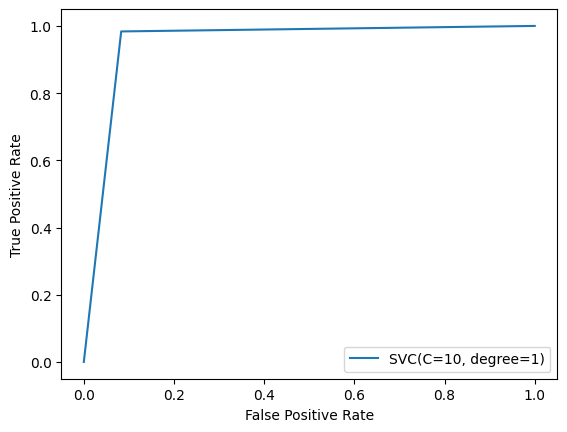

In [91]:
fpr,tpr,thresholds = metrics.roc_curve(y_test,pred)
roc_auc = metrics.auc(fpr,tpr)
rfcurve = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, estimator_name = model)
rfcurve.plot()

In [92]:
import joblib

In [93]:
joblib.dump(model,'HR_attrition.pk1')

['HR_attrition.pk1']

In [94]:
df = pd.DataFrame()
actual = np.array(y_test)
df['Actual'] = actual
df['Prediction'] = pred
df

,Actual,Prediction
0,1,1
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
735,0,0
736,1,1
737,1,1
738,0,0
